In [1]:
from dataset_evaluation import (sentence_level_quality,
                                entity_level_quality,
                                pipeline_prediction,
                                fidelity)


import dataset_evaluation as dse
%load_ext autoreload
%autoreload 2

Some weights of BertModel were not initialized from the model checkpoint at jjzha/jobbert-base-cased and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [2]:
import pandas as pd
import seaborn as sns
import os
import json
from datasets import load_dataset
import random

# Annotated dataset


### Fidelity


On the real data :

In [3]:
vacancies = pd.read_csv("../../data/processed/real/job_offers_compound_2.csv")

metric = fidelity(list(vacancies["enhanced_sentences"]), model_id="gpt2")

Using pad_token, but it is not set yet.


  0%|          | 0/76 [00:00<?, ?it/s]

/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


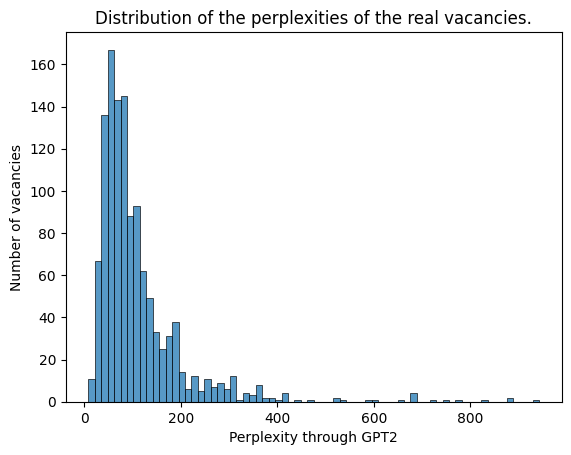

In [7]:
g = sns.histplot(data=pd.DataFrame(metric).drop("mean_perplexity", axis=1), x="perplexities")
g.set_title("Distribution of the perplexities of the real vacancies.")
g.set_xlabel("Perplexity through GPT2")
g.set_ylabel("Number of vacancies");

In [10]:
annot_fidelity = metric["mean_perplexity"]
annot_fidelity

111.46399115887662

### ELQ

In [3]:
test = pd.read_csv("https://raw.githubusercontent.com/jensjorisdecorte/Skill-Extraction-benchmark/main/tech_test_annotations.csv")
multilabel = test.groupby("sentence").agg({"label": lambda x : x.tolist() , "span": lambda x : x.tolist()}).reset_index()
annotated_records = multilabel.to_dict(orient='records')

Some weights of BertModel were not initialized from the model checkpoint at jjzha/jobbert-base-cased and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
if(os.path.isfile("preds.json")):
    print("> Loading precomputed results")
    with open('preds.json', 'r') as f:
        pip_annot_predictions = json.load(f)
else :
    print("> Computing predictions")
    pip_annot_predictions = pipeline_prediction(annotated_records)
    with open('preds.json', 'w') as f:
        json.dump(pip_annot_predictions, f)

In [6]:
for res in pip_annot_predictions[:10]:
    print("-"*100)
    print("labels : ", res[0]["label"])
    for sk in res[0]["matched_skills"]:
        print("span : ", sk)
        print("\t - ", res[0]["matched_skills"][sk]["name+definition"])
    

----------------------------------------------------------------------------------------------------
labels :  ['LABEL NOT PRESENT', 'LABEL NOT PRESENT', 'LABEL NOT PRESENT', 'Solidity']
span :  cypress
	 -  use chromatography software : use the chromatography data system software which collects and analyses the chromatography detectors results.
span :  pytest
	 -  read broadcast programming : read the programming schedule in order to know which programs need to be recorded and aired.
span :  truffle
	 -  decentralized application frameworks : the different software frameworks, and their characteristics, advantages and disadvantages, that allow the development of decentralized applications on blockchain infrastructure. examples are truffle, embark, epirus, openzeppelin, etc.
----------------------------------------------------------------------------------------------------
labels :  ['analyse business requirements', 'communicate with stakeholders']
span :  ability to analyse requireme

In [5]:
pip_annot_ELQ = entity_level_quality(pip_annot_predictions)
pip_annot_ELQ

new


  0%|          | 0/425 [00:00<?, ?it/s]

[[['LABEL NOT PRESENT', 'LABEL NOT PRESENT', 'LABEL NOT PRESENT', 'Solidity'], ['cypress', 'pytest', 'truffle']], [['analyse business requirements', 'communicate with stakeholders'], ['ability to analyse requirements']], [['manage a team', 'lead others', 'mentor individuals', 'coach employees'], ['ability to support the developers in your team']], [['work in teams', 'meet commitments', 'work in teams', 'meet commitments'], ['ability to work in large collaborative teams']], [['work in teams', 'meet commitments', 'think innovately', 'work in teams', 'meet commitments', 'think innovately'], ['ability to work in large collaborative teams']], [['information architecture', 'LABEL NOT PRESENT'], ['advanced knowledge of architecture and design across all systems']], [['deploy cloud resource', 'deploy cloud resource'], ['cloud micro-service and container deployment patterns']], [['LABEL NOT PRESENT', 'LABEL NOT PRESENT', 'LABEL NOT PRESENT'], ['bs/ba degree']], [['UNDERSPECIFIED'], ['oracle or 

/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'1_to_1': {'accuracy': 0.08753709198813056,
  'precision_micro': 0.08753709198813056,
  'precision_macro': 0.05487297789929369,
  'recall_micro': 0.08753709198813056,
  'recall_macro': 0.04876921612931599,
  'F1_micro': 0.08753709198813056,
  'F1_macro': 0.05164136371121422},
 'many_to_many': {'jaccard_accuracy': 0.0016470588235294116}}

### SLQ

In [22]:
annot_SLQ = sentence_level_quality(pd.DataFrame(annotated_records).explode("label"))

Some weights of BertModel were not initialized from the model checkpoint at jjzha/jobbert-base-cased and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/1164 [00:00<?, ?it/s]

  0%|          | 0/1164 [00:00<?, ?it/s]

/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


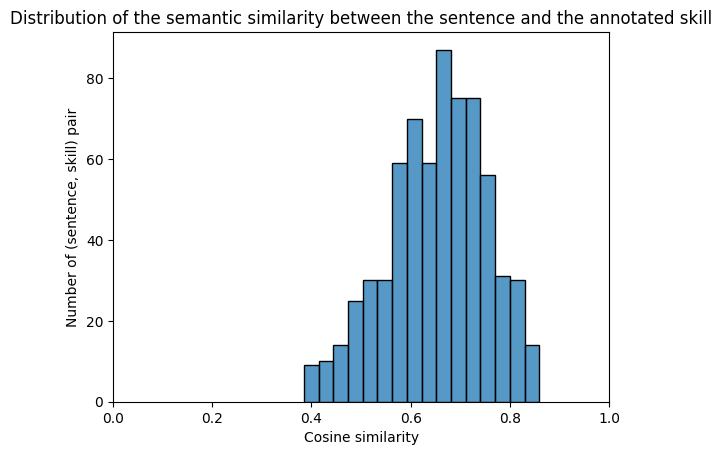

In [28]:
g = sns.histplot(data=annot_SLQ.reset_index(), x="sim")
g.set_xlim((0, 1))
g.set_title("Distribution of the semantic similarity between the sentence and the annotated skill")
g.set_xlabel("Cosine similarity")
g.set_ylabel("Number of (sentence, skill) pair");

In [27]:
annot_SLQ_metrics = {
    'mean': annot_SLQ.sim.mean(),
    'median': annot_SLQ.sim.median(),
    'var': annot_SLQ.sim.var()
}

### Conlusion

In [ ]:
metrics = {
    "annotated" : {
        "fidelity" : annot_fidelity,
        "SLQ": annot_SLQ_metrics,
        "pip_ELQ": pip_annot_ELQ,
    }
}

# Synthetic dataset

In [8]:
ds = load_dataset("jensjorisdecorte/Synthetic-ESCO-skill-sentences")["train"]

### Fidelity

In [9]:
metric = fidelity(ds["sentence"], model_id="gpt2")

Using pad_token, but it is not set yet.


  0%|          | 0/8642 [00:00<?, ?it/s]

In [15]:
import numpy as np


ppls = pd.DataFrame(metric).drop("mean_perplexity", axis=1)
display(ppls.describe())

np.percentile(ppls.perplexities, 99)

,perplexities
count,138260.000000
mean,104.674018
std,272.359776
min,6.415185
25%,40.929951
50%,65.056492
75%,110.035660
max,40410.925781


664.3153106689473

/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


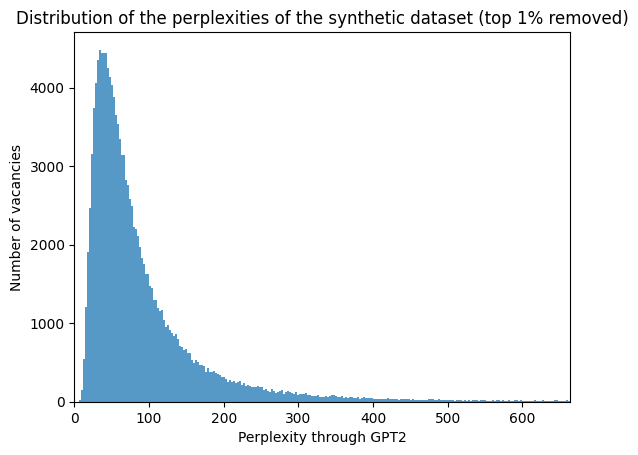

In [18]:
g = sns.histplot(data=pd.DataFrame(metric).drop("mean_perplexity", axis=1), x="perplexities")
g.set_title("Distribution of the perplexities of the synthetic dataset (top 1% removed)")
g.set_xlabel("Perplexity through GPT2")
g.set_ylabel("Number of vacancies")
g.set_xlim((0, np.percentile(ppls.perplexities, 99)));

In [28]:
high_ppl_sentence_synth = ds[ppls[ppls.perplexities > np.percentile(ppls.perplexities, 99)].index]

# NO PLACE HERE
# with open("high_ppl_sentence_synth.json", 'w') as f:
#     json.dump(high_ppl_sentence_synth, f)    

high_ppl_sentence_synth

{'sentence': ['urban planning law experience required for this position',
  'brick manufacturing company seeking individuals with experience transferring bricks',
  'excellent sight-reading skills and proficiency reading musical notation',
  'previous experience advising legislators preferred but not required',
  'wrecking ball operators needed for demolition project in downtown area',
  'we are seeking an experienced plot show control cues specialist for an upcoming event.',
  'museum is seeking a Collections Management System Specialist',
  'experienced in binding books by hand',
  'able to operate binding equipment and machines',
  'workers with certification in degumming liquids preferred.',
  'experience in selling bicycles and advising customers a plus',
  'candidate must be adept at cutting and conditioning tobacco leaves',
  'successful candidate should have experience in blending tobacco leaves',
  'knowledge of techniques used in conditioning tobacco leaves required',
  'qual

In [15]:
synth_fidelity = metric["mean_perplexity"]
synth_fidelity

104.67401827280452

### ELQ

In [4]:
synth_ds = pd.DataFrame(ds)
csynth_ds = synth_ds.groupby("sentence").agg({'skill' : lambda x: x.tolist()}).reset_index()
csynth_records = csynth_ds.to_dict(orient='records')

In [ ]:
if(os.path.isfile("preds_synth_2.json")):
    print("> Loading precomputed results")
    with open('preds_synth_2.json', 'w') as f:
        pip_synth_predictions = json.load(f)
else :
    print("> Computing predictions")
    subs_csr = random.sample(csynth_records, 100)
    pip_synth_predictions = pipeline_prediction(subs_csr)
    with open('preds_synth_2.json', 'w') as f:
        json.dump(pip_synth_predictions, f)

In [36]:
for res in pip_synth_predictions:
    print("-"*100)
    print("labels : ", res[0]["skill"])
    for sk in res[0]["matched_skills"]:
        print("span : ", sk)
        print("\t - ", res[0]["matched_skills"][sk]["name+definition"])

----------------------------------------------------------------------------------------------------
labels :  ['apply holistic approach within social services']
span :  holistic approach
	 -  develop investigation strategy : develop strategies used in an investigation to gather information and intelligence in the most productive way, compliant with legislation, ensuring that the strategy is adapted to each individual case in order to obtain intelligence as efficiently and quickly as possible.
----------------------------------------------------------------------------------------------------
labels :  ['demonstrate intercultural competences in hospitality services']
----------------------------------------------------------------------------------------------------
labels :  ['conduct radiotherapy computer planning']
span :  pressure
	 -  edit negatives : use different software products and techniques to process photographic negatives and adapt the images to the desired specifications

In [11]:
pip_synth_predictions[0]

[{'sentence': 'position requires the ability to work a flexible schedule and lift up to 50 pounds regularly, as well as skill in wrapping yarn around bobbins or spools.',
  'skill': ['wrap yarn around bobbins'],
  'extracted_skills': ['ability to work a flexible schedule',
   'lift up to 50 pounds regularly',
   'skill in wrapping yarn around bobbins or spools'],
  'skill_candidates': {'ability to work a flexible schedule': [{'unique_id': 1218,
     'Type Level 2': 'conducting studies, investigations and examinations',
     'name+definition': 'develop investigation strategy : develop strategies used in an investigation to gather information and intelligence in the most productive way, compliant with legislation, ensuring that the strategy is adapted to each individual case in order to obtain intelligence as efficiently and quickly as possible.'},
    {'unique_id': 1323,
     'Type Level 2': 'accessing and analysing digital data',
     'name+definition': 'create digital files : create d

In [14]:
pip_synth_ELQ = entity_level_quality(pip_synth_predictions, label_key="skill")

Some weights of BertModel were not initialized from the model checkpoint at jjzha/jobbert-base-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


new


  0%|          | 0/100 [00:00<?, ?it/s]

[[['wrap yarn around bobbins'], ['ability to work a flexible schedule', 'lift up to 50 pounds regularly', 'skill in wrapping yarn around bobbins or spools']], [['inspect manufacture of rolling stock'], ['safety and manufacturing standards in rolling stock production']], [['identify support mechanisms to develop your professional practice'], ['monitor trends in funding to finance their professional development']], [['create digital images'], ['software to create digital images']], [['calculate rates per hours'], ['attention to detail']], [['create digital content'], ['digital content']], [['handle delivery of furniture goods'], ['lift heavy furniture items', 'work well with customers']], [['tackle issues that block academic progress'], ['students and parents']], [['batch tank types'], ['knowledge of batch tank types']], [['use wood carving knives'], ['carving knives and tools']], [['monitor social impact'], ['professionals dedicated to improving our society']], [['smoking pipes material

/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
pip_synth_ELQ

{'1_to_1': {'accuracy': 0.03,
  'precision_micro': 0.03,
  'precision_macro': 0.016304347826086956,
  'recall_micro': 0.03,
  'recall_macro': 0.016304347826086956,
  'F1_micro': 0.03,
  'F1_macro': 0.016304347826086956},
 'many_to_many': {'jaccard_accuracy': 0.055}}

### SLQ

In [13]:
synth_SLQ = sentence_level_quality(synth_ds[:10_000], label_key="skill")

Some weights of BertModel were not initialized from the model checkpoint at jjzha/jobbert-base-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/10000 [00:00<?, ?it/s]

/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/SkillThrills/protosp01/dataset_generation/dataset_evaluation.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["embeddings"] = dataset["sentence"]\
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/SkillThrills/protosp01/dataset_generation/dataset_evaluation.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["embeddings"] = dataset["embeddings"].apply(lambda x : x.detach())


  0%|          | 0/10000 [00:02<?, ?it/s]

/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/SkillThrills/protosp01/dataset_generation/dataset_evaluation.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["sim"] = dataset[["embeddings", label_key]].progress_apply(compute_cos_sim, axis=1)


/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


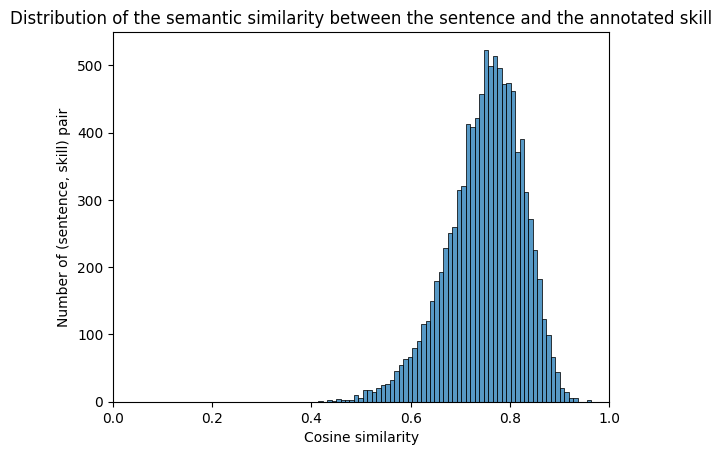

In [14]:
g = sns.histplot(data=synth_SLQ.reset_index(), x="sim")
g.set_xlim((0, 1))
g.set_title("Distribution of the semantic similarity between the sentence and the annotated skill")
g.set_xlabel("Cosine similarity")
g.set_ylabel("Number of (sentence, skill) pair");

## Prototype

In [29]:
proto = pd.read_csv("./generation/generated/PROTOTYPE/prototype.csv").drop("Unnamed: 0", axis=1)
proto

,skills,sentence,sentence_len,skill_number
0,['check quality of enamel'],We are seeking a detail-oriented individual wi...,31,1
1,['check quality of enamel'],We are seeking a meticulous and detail-oriente...,151,1
2,['contribute to high level health strategic de...,Join our team and use your expertise in shapin...,32,1
3,['contribute to high level health strategic de...,We are seeking a dynamic individual to join ou...,164,1
4,"['create underwriting guidelines', 'develop pr...",We are seeking a highly skilled candidate to j...,162,10
...,...,...,...,...
8664,"['develop automated migration methods', 'migra...",We are seeking a highly skilled and experience...,165,2
8665,"['process booking', 'process reservations', 'o...",We are seeking a highly organized and customer...,29,3
8666,"['process booking', 'process reservations', 'o...",We are currently seeking a detail-oriented and...,168,3
8667,"['perform rail operations risk management', 'a...",We are seeking candidates who possess a deep u...,42,3


### Fidelity

In [30]:
metric = fidelity(list(proto["sentence"].values), model_id="gpt2")

Using pad_token, but it is not set yet.


  0%|          | 0/542 [00:00<?, ?it/s]

/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


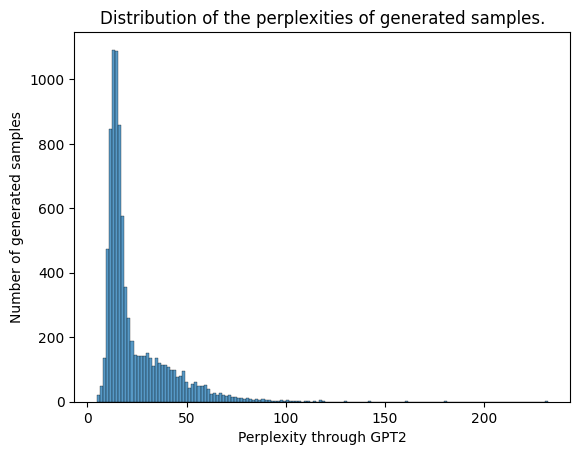

In [32]:
g = sns.histplot(data=pd.DataFrame(metric).drop("mean_perplexity", axis=1), x="perplexities")
g.set_title("Distribution of the perplexities of generated samples.")
g.set_xlabel("Perplexity through GPT2")
g.set_ylabel("Number of generated samples");

In [11]:
metric["mean_perplexity"]

23.698688362472293

### ELQ

In [16]:
proto = pd.read_csv("./generation/generated/PROTOTYPE/prototype.csv").drop("Unnamed: 0", axis=1)
proto.head(5)

,skills,sentence,sentence_len,skill_number
0,['check quality of enamel'],We are seeking a detail-oriented individual wi...,31,1
1,['check quality of enamel'],We are seeking a meticulous and detail-oriente...,151,1
2,['contribute to high level health strategic de...,Join our team and use your expertise in shapin...,32,1
3,['contribute to high level health strategic de...,We are seeking a dynamic individual to join ou...,164,1
4,"['create underwriting guidelines', 'develop pr...",We are seeking a highly skilled candidate to j...,162,10


In [47]:
# proto_sub = proto.sample(200)
# proto_sub.to_csv("proto_sub.csv")
proto_sub = pd.read_csv("proto_sub.csv")

In [ ]:
if(os.path.isfile("proto_sub_pred.json")):
    print("> Loading precomputed results")
    with open('proto_sub_pred.json', 'w') as f:
        proto_sub_predictions = json.load(f)
else :
    print("> Computing predictions")
    proto_sub_predictions = pipeline_prediction(proto_sub.to_dict("records"))
    with open('preds_sub_pred.json', 'w') as f:
        json.dump(proto_sub_predictions, f)

In [53]:
few_res = ""
for res in proto_sub_predictions:
    few_res += "-"*100 +"\n"
    few_res += "labels : " + str(res[0]["skills"]) + "\n"
    for sk in res[0]["matched_skills"]:
        few_res += "span : " + sk +"\n"
        few_res += "\t - " + res[0]["matched_skills"][sk]["name+definition"] + "\n"

with open("proto_preds.txt", "w", encoding="utf-8") as f:
    f.write(few_res)

In [17]:
entity_level_quality(proto_sub_predictions, label_key="skills")

Some weights of BertModel were not initialized from the model checkpoint at jjzha/jobbert-base-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


new


  0%|          | 0/200 [00:00<?, ?it/s]

[["['minimize risks in tree operations']", ['safety and mitigating potential hazards']], ["['verify feasibility', 'analyse the artistic concept based on stage actions', 'determine production feasibility', 'assess artistic proposal']", ['artistic process', 'critically evaluate the viability of proposed concepts and action plans', 'analyzing stage actions', 'practicality and feasibility of artistic concepts', 'determine the technical and logistical feasibility of art proposals', 'keen eye for artistic detail', 'assess proposals']], ["['manage office facility systems']", ['organized and detail-oriented individual', 'management and maintenance of all systems required for daily operations']], ["['prepare legislation proposition', 'make legislative decisions']", ['impactful proposals', 'critical decisions', 'legislative analysis', 'decision-making', 'legislative initiatives', 'impactful changes', 'legislative experts', 'proposal development', 'legislative decision-making', 'legislative proce

/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'1_to_1': {'accuracy': 0.49523809523809526,
  'precision_micro': 0.49523809523809526,
  'precision_macro': 0.40064291866617446,
  'recall_micro': 0.49523809523809526,
  'recall_macro': 0.4318475452196382,
  'F1_micro': 0.49523809523809526,
  'F1_macro': 0.415660403190757},
 'many_to_many': {'jaccard_accuracy': 0.0}}

### SLQ

In [39]:
proto = pd.read_csv("./generation/generated/PROTOTYPE/prototype.csv").drop("Unnamed: 0", axis=1).sample(5_000)

In [40]:
proto_sub["skills"] = proto.skills.apply(eval)
exproto = proto_sub.explode("skills")
slq_proto_sub = sentence_level_quality(exproto, label_key="skills")

  0%|          | 0/422 [00:00<?, ?it/s]

  0%|          | 0/422 [00:00<?, ?it/s]

/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


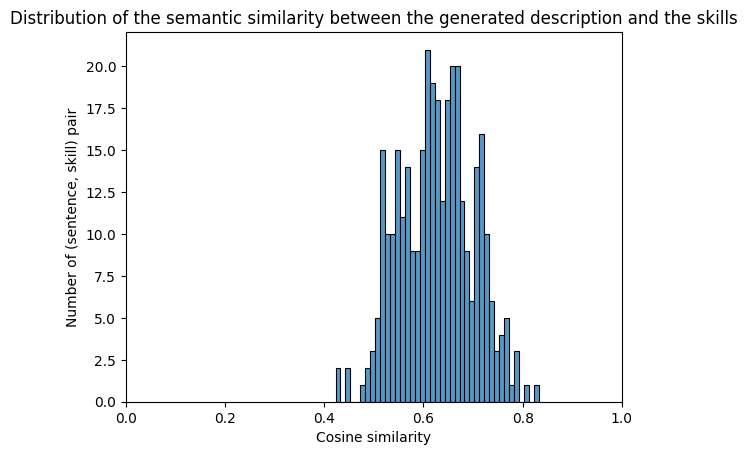

In [45]:
g = sns.histplot(data=slq_proto_sub.reset_index(), x="sim", binwidth=.01)
g.set_xlim((0, 1))
g.set_title("Distribution of the semantic similarity between the generated description and the skills")
g.set_xlabel("Cosine similarity")
g.set_ylabel("Number of (sentence, skill) pair");